In [189]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime
from sklearn.model_selection import train_test_split
from sklearn import base, metrics, model_selection, preprocessing, tree, utils
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

from sklearn.model_selection import GridSearchCV
from IPython.display import Image

In [190]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [191]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import base, metrics, model_selection, preprocessing, tree, utils
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
import shap
import xgboost as xgb
import pandas_profiling
import itertools
import phik
from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix

In [192]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import base, metrics, model_selection, preprocessing, tree, utils
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
import shap
import xgboost as xgb
import pandas_profiling
import itertools
import phik
from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import cross_validate, KFold

In [193]:
# Read in the Data
data = pd.read_csv(r"C:\Users\lhr\Desktop\【机器学习】\数据\0712.csv",index_col=0)
data.head()

,Spec.,D,H,b,h,Ag,Circular,r,ρ,fc,...,tfrp,Efrp,Ffrp,Ltype,ρs,Ebar,Fbar,e,η,Pmax
No.,,,,,,,,,,,,,,,,,,,,,
1,CFRP1,152.0,457,NaN,NaN,18136.64,Yes,0,1.0,21.0,...,0.17,228.0,3790.0,"4 NO,9.5",1.563292,209.0,483.0,0.0,36.0,774.0
2,CFRP2,152.0,457,NaN,NaN,18136.64,Yes,0,1.0,21.0,...,0.17,228.0,3790.0,"4 NO,9.5",1.563292,209.0,483.0,0.0,45.0,720.6
3,CFRP3,152.0,457,NaN,NaN,18136.64,Yes,0,1.0,21.0,...,0.17,228.0,3790.0,"4 NO,9.5",1.563292,209.0,483.0,0.0,25.0,747.3
4,CFRP4,152.0,457,NaN,NaN,18136.64,Yes,0,1.0,21.0,...,0.17,228.0,3790.0,"4 NO,9.5",1.563292,209.0,483.0,0.0,51.0,645.0
5,CFRP-COR,203.0,914,NaN,NaN,32349.07,Yes,0,1.0,21.0,...,0.17,228.0,3790.0,"8 NO,9.5",1.752933,209.0,483.0,0.0,0.0,1926.0


In [194]:
data["Circular"] = (data["Circular"]== "Yes").astype("int")
data['r'] = data['r'].astype(float)
data['Nfrp'] = data['Nfrp'].astype(float)

In [195]:
# All the Data
Data= data[[ 'Ag', 'ρ', 'fc', 'tfrp', 'Efrp', 'Ffrp', 'ρs', 'Ebar','Fbar','e','η','Pmax']]

# Concentric RC-Columns only
DataConcentric = Data[(Data["e"]==0)]
DataConcentric = DataConcentric.drop('e', axis = 1)

# Eccentric RC-Columns only
DataEccentric =  Data[(Data["e"] > 0)]

In [196]:
y = Data['Pmax']
X = Data.drop('Pmax', axis = 1)

X.head()

,Ag,ρ,fc,tfrp,Efrp,Ffrp,ρs,Ebar,Fbar,e,η
No.,,,,,,,,,,,
1,18136.64,1.0,21.0,0.17,228.0,3790.0,1.563292,209.0,483.0,0.0,36.0
2,18136.64,1.0,21.0,0.17,228.0,3790.0,1.563292,209.0,483.0,0.0,45.0
3,18136.64,1.0,21.0,0.17,228.0,3790.0,1.563292,209.0,483.0,0.0,25.0
4,18136.64,1.0,21.0,0.17,228.0,3790.0,1.563292,209.0,483.0,0.0,51.0
5,32349.07,1.0,21.0,0.17,228.0,3790.0,1.752933,209.0,483.0,0.0,0.0


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
model = XGBRegressor()

In [28]:
params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.75, 1.0],
}

In [29]:
grid_search = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.5, 0.75, 1.0]},
             scoring='neg_mean_squared_error')

In [30]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
Best score:  44214.65363195755


In [34]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

In [36]:
df_pred = pd.DataFrame({'Actual':y, 'Predicted': y_pred})


In [37]:
df_pred.to_excel('predictions.xlsx', index=False)

In [41]:
import xgboost as xgb
import graphviz


In [42]:
import os
os.environ["PATH"] += os.pathsep + 'D:\机器学习\Graphviz/bin/'

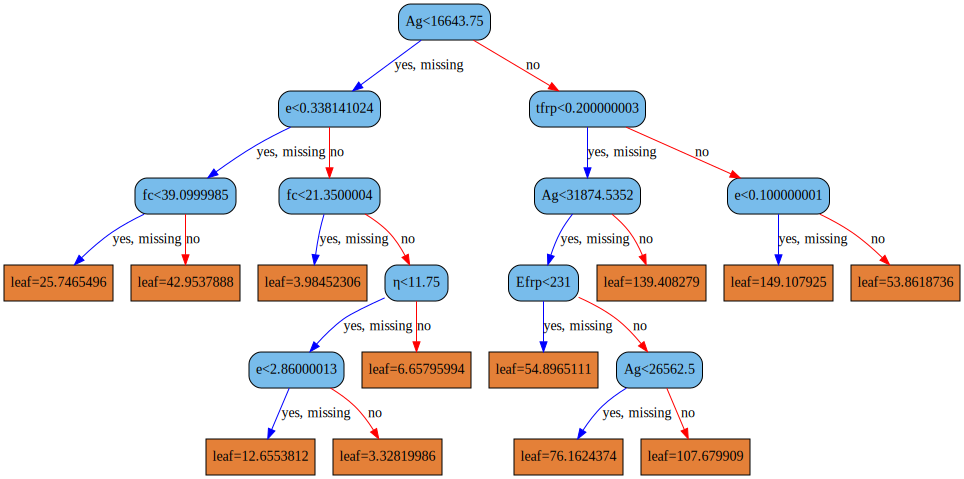

In [44]:
tr= xgb.to_graphviz(model_xgb, num_trees=2, condition_node_params={'shape': 'box',
 'style': 'filled,rounded', 'fillcolor': '#78bceb'},leaf_node_params={'shape': 'box',
 'style': 'filled',
 'fillcolor': '#e48038'})
tr

In [48]:
tr.render('123', format='png')

'123.png'

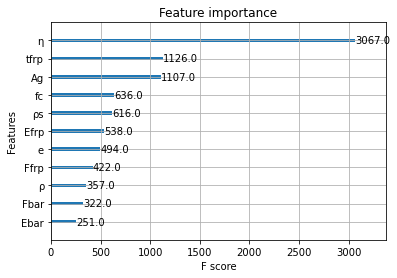

<Figure size 432x288 with 0 Axes>

In [56]:
plot_importance(model_xgb)
pyplot.show()
plt.savefig("100.png")

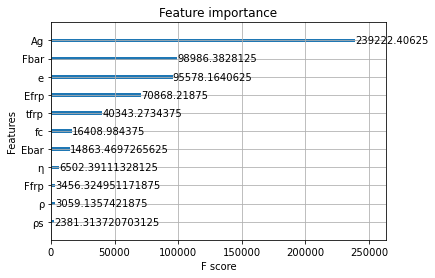

<Figure size 432x288 with 0 Axes>

In [57]:
plot_importance(model_xgb,importance_type='gain')
pyplot.show()
plt.savefig("101.png")

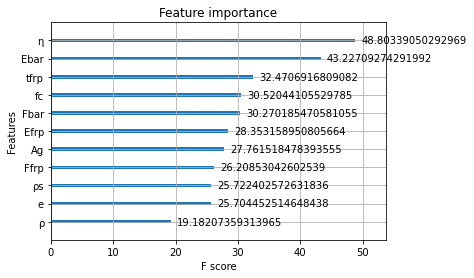

<Figure size 432x288 with 0 Axes>

In [58]:
plot_importance(model_xgb,importance_type='cover')
pyplot.show()
plt.savefig("102.png")

In [199]:
featureName=[r'$A_g$',  r'$ρ$', r'$f_c$', 
             r'$t_{frp}$',
       r'$E_{frp}$',  r'$F_{frp}$',r'$ρ_s$',  r'$E_{bar}$',r'$F_{bar}$',r'$e$', r'$η$']

In [200]:
shap.initjs()
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


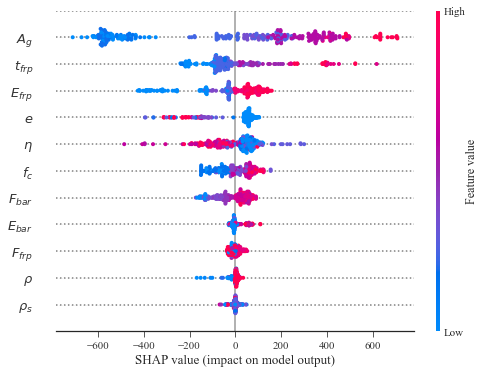

In [201]:
# summarize the effects of all the features
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 20
plt.rcParams["font.family"] = "Times New Roman" 
for row in range(len(shap_values)):
    plt.axhline(y=row, color='gray', linestyle='dotted')
shap.summary_plot(shap_values, X, feature_names= featureName,show=False)
plt.savefig("716.png")

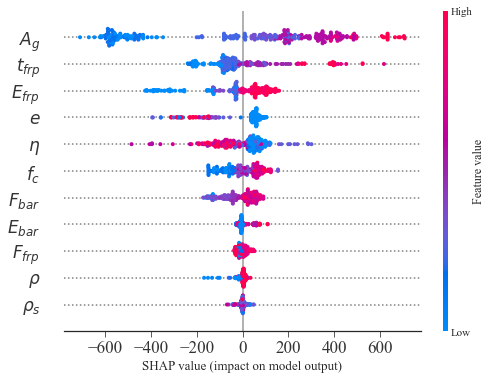

In [202]:
# summarize the effects of all the features
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 20
plt.rcParams["font.family"] = "Times New Roman" 





shap.summary_plot(shap_values, X, feature_names= featureName,show=False)


plt.axhline(y=0, color='gray', linestyle='dotted')
plt.axhline(y=1, color='gray', linestyle='dotted')
plt.axhline(y=2, color='gray', linestyle='dotted')
plt.axhline(y=3, color='gray', linestyle='dotted')
plt.axhline(y=4, color='gray', linestyle='dotted')
plt.axhline(y=5, color='gray', linestyle='dotted')
plt.axhline(y=6, color='gray', linestyle='dotted')
plt.axhline(y=7, color='gray', linestyle='dotted')
plt.axhline(y=8, color='gray', linestyle='dotted')
plt.axhline(y=9, color='gray', linestyle='dotted')
plt.axhline(y=10, color='gray', linestyle='dotted')


plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


plt.savefig("716.png",dpi=1000)

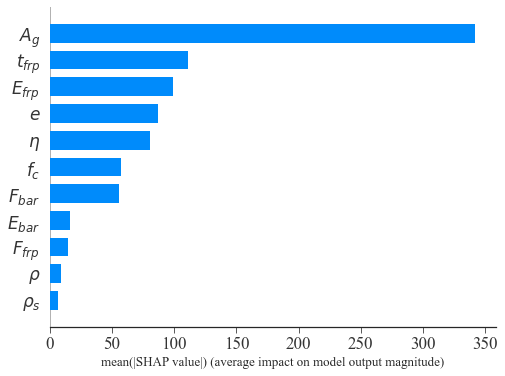

In [203]:
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 30
plt.rcParams["font.family"] = "Times New Roman" 
shap.summary_plot(shap_values, X, plot_type="bar",feature_names=featureName, max_display=12,show=False)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.savefig("717.png",dpi=1000)

In [205]:
import matplotlib.pyplot as plt

In [119]:
plt.rcParams.update({'font.size': 20})


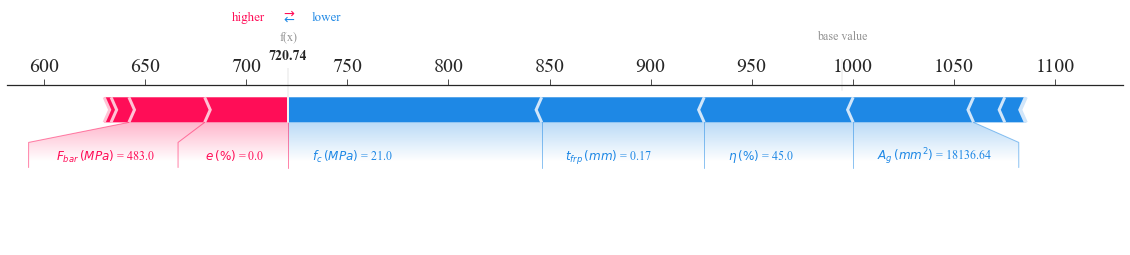

In [254]:
import matplotlib.pyplot as plt

# 设置默认字体大小
plt.rcParams['font.size'] = 20
# 可视化代码
force=shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:], feature_names=featureName, matplotlib=True, show=False)
plt.savefig("718.png", bbox_inches='tight',dpi=1000)


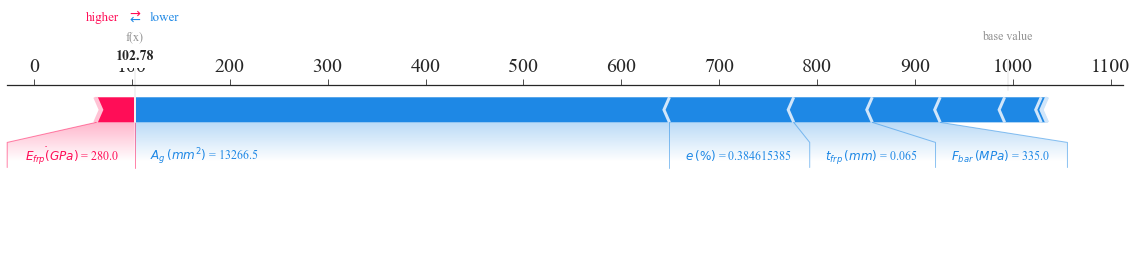

In [255]:
import matplotlib.pyplot as plt

# 设置默认字体大小
plt.rcParams['font.size'] = 20

force=shap.force_plot(explainer.expected_value, shap_values[45,:], X.iloc[45,:], feature_names=featureName, matplotlib = True,show=False) 
plt.savefig("719.png",bbox_inches='tight',dpi=1000)

In [208]:
featureName=[r'$A_g\,(mm^{2})$',  r'$ρ\,(\%)$', r'$f_c\,(MPa)$', r'$t_{frp}\,(mm)$',
       r'$E_{frp}\.(GPa)$', r'$F_{frp}\,(MPa)$',r'$ρ_s\,(\%)$',  r'$E_{bar}\,(GPa)$',r'$F_{bar}\,(MPa)$',r'$e\,(\%)$', r'$η\,(\%)$']

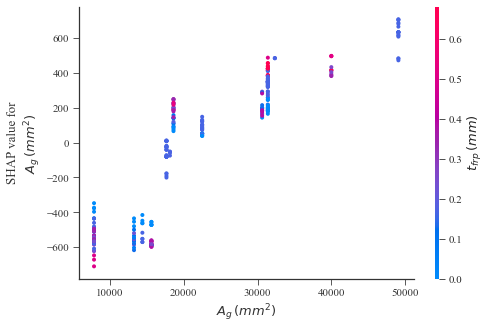

<Figure size 720x576 with 0 Axes>

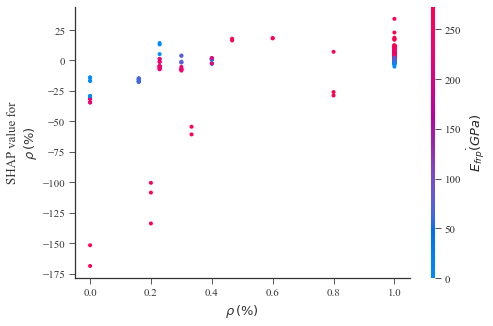

<Figure size 720x576 with 0 Axes>

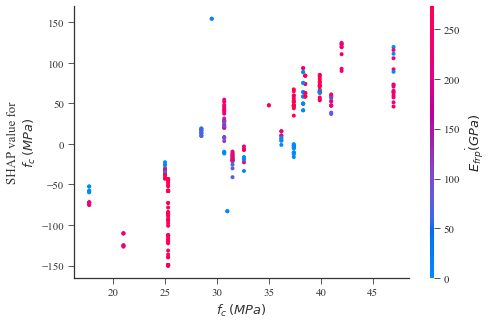

<Figure size 720x576 with 0 Axes>

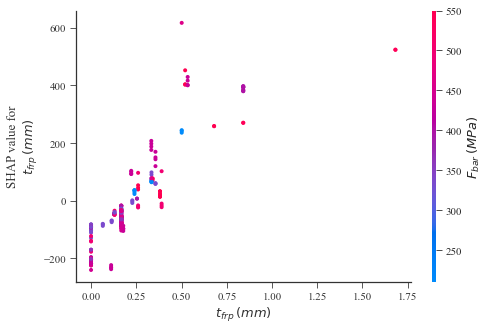

<Figure size 720x576 with 0 Axes>

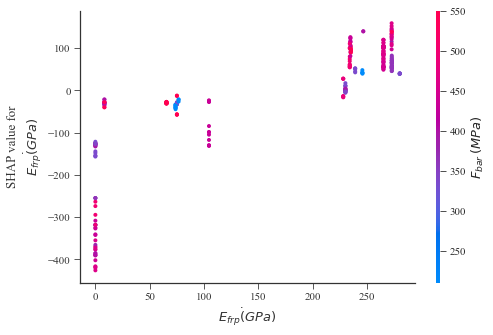

<Figure size 720x576 with 0 Axes>

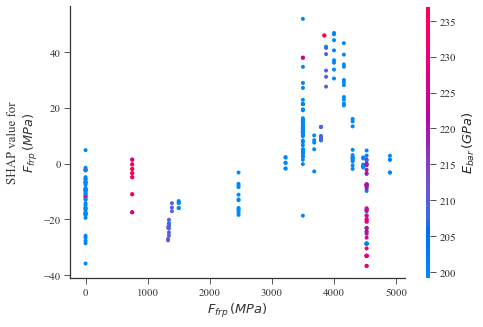

<Figure size 720x576 with 0 Axes>

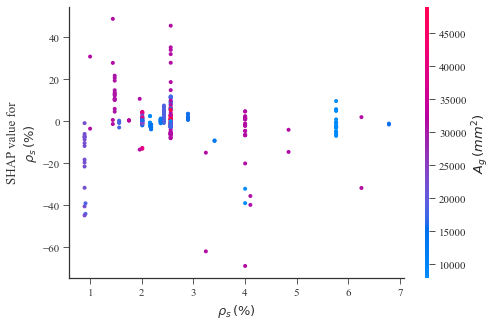

<Figure size 720x576 with 0 Axes>

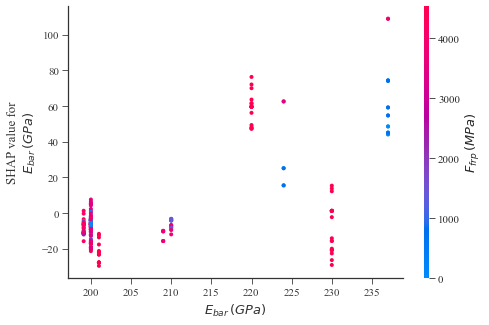

<Figure size 720x576 with 0 Axes>

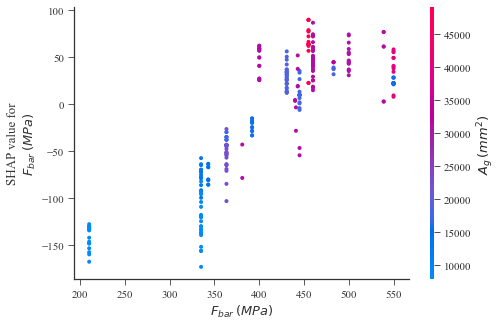

<Figure size 720x576 with 0 Axes>

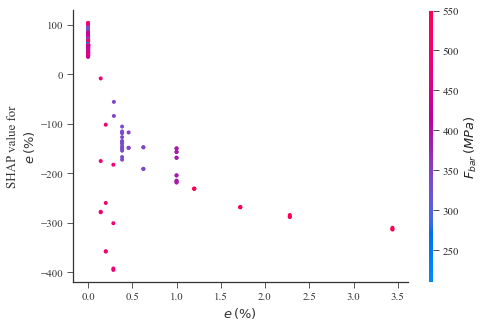

<Figure size 720x576 with 0 Axes>

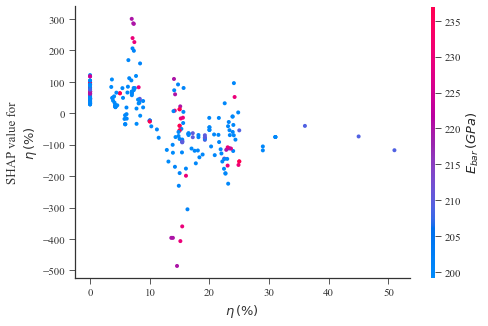

<Figure size 720x576 with 0 Axes>

In [159]:
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 15
plt.rcParams["font.family"] = "Times New Roman" # ou serif
#fig, ax = plt.subplots(figsize=(8, 5))
length = len(featureName)
for i in range(length):
    name =X_train.columns[i]
    shap.dependence_plot(i, shap_values, X,feature_names=featureName, show = False)
    plt.show()
    plt.savefig("720.png")

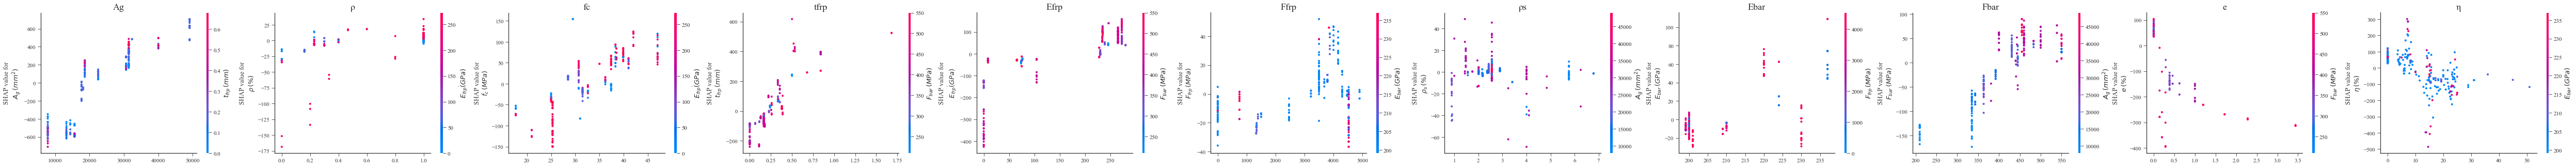

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# 设置全局绘图样式
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 15
plt.rcParams["font.family"] = "Times New Roman" # 或者选择 serif 字体

# 创建画布和子图
fig, axs = plt.subplots(nrows=1, ncols=length, figsize=(length*8, 5))

# 循环生成每个特征的依赖图
for i, ax in enumerate(axs):
    name = X_train.columns[i]
    shap.dependence_plot(i, shap_values, X, feature_names=featureName, ax=ax, show=False)

    # 设置子图标题
    ax.set_title(name)
    ax.set_xlabel('')

# 保存图像
plt.savefig("720.png", bbox_inches='tight')

# 显示图像
plt.show()

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# 设置全局绘图样式
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 18
plt.rcParams["font.family"] = "Times New Roman" # 或者选择 serif 字体




# 循环生成每个特征的依赖图，并保存为单独的图片
for i in range(length):
    name = X_train.columns[i]
    unit = featureName[i].split('$')[-1]
    fig, ax = plt.subplots()
    shap.dependence_plot(i, shap_values, X, feature_names=featureName, show=False, ax=ax)
    plt.title(f"{name} ({unit})")  # 添加单位到标题中
    plt.savefig(f"{name}.png", bbox_inches='tight')
    plt.close(fig)

In [261]:
# 设置全局绘图样式
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 5
plt.rcParams["font.family"] = "Times New Roman" # 或者选择 serif 字体

# 循环生成每个特征的依赖图，并保存为单独的图片
for i in range(length):
    name = X_train.columns[i]
    unit = featureName[i].split('$')[-1]
    fig, ax = plt.subplots()
    shap.dependence_plot(i, shap_values, X, feature_names=featureName, dot_size=125,show=False, ax=ax)
    plt.title(name)
    
    # 设置x轴刻度线标签字体大小
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25)

    # 设置y轴刻度线标签字体大小
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(25)
    
    ax.xaxis.label.set_fontsize(25)  # 设置x轴标签的字体大小
    ax.yaxis.label.set_fontsize(25)  # 设置y轴标签的字体大小


    
    # 设置dpi参数以提高分辨率和清晰度
    plt.savefig(f"{name}.png", bbox_inches='tight', dpi=1000)

    plt.close(fig)

    
    
